EXP NO:04
DATE:
Comparative Analysis of Prediction Accuracy for Regression Models on Mobile Price
Range Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('/content/train.csv') # Ensure the file is in the same directory
print("Dataset Preview:")
data.head()

Dataset Preview:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
# Define features and target
target = 'price_range' # Replace with your actual target column name
X = data.drop(target, axis=1)
y = data[target]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define models
models = {
'Support Vector Machine': SVR(kernel='linear'),
           'Linear Regression': LinearRegression(),
'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[model_name] = {
    'Model': model,
    'MAE': mae,
    'MSE': mse,
    'R2 Score': r2
    }
    # Print results for the current model
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")


Support Vector Machine Performance:
Mean Absolute Error (MAE): 0.2689714074471921
Mean Squared Error (MSE): 0.10559348725696788
R^2 Score: 0.9208589230738627

Linear Regression Performance:
Mean Absolute Error (MAE): 0.2683009553746579
Mean Squared Error (MSE): 0.10469290211930674
R^2 Score: 0.9215339010437136

Random Forest Performance:
Mean Absolute Error (MAE): 0.1632
Mean Squared Error (MSE): 0.0717505
R^2 Score: 0.9462238440314973


In [3]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.1632
Mean Squared Error (MSE): 0.0717505
R^2 Score: 0.9462238440314973


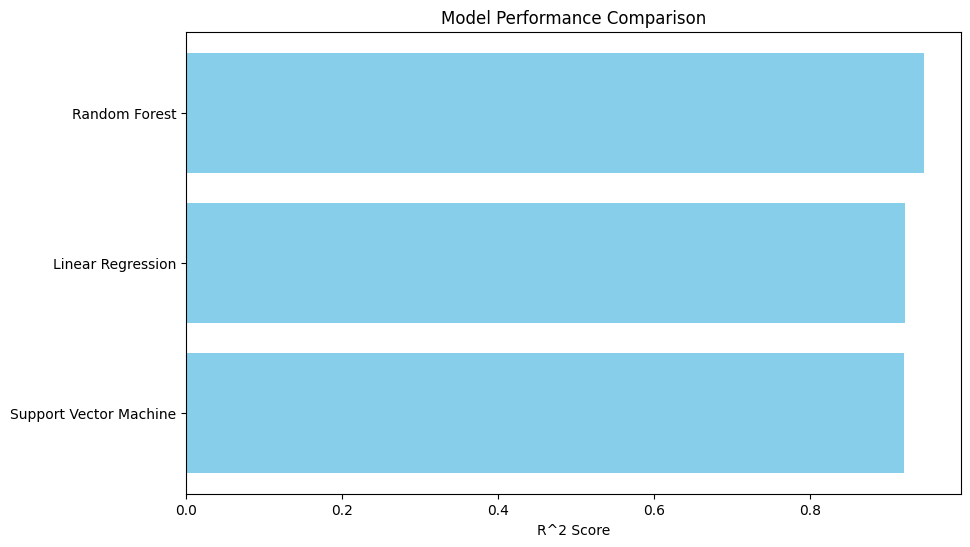

In [4]:
import matplotlib.pyplot as plt
# Visualization of R2 scores
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]
plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_scores, color='skyblue')
plt.xlabel('R^2 Score')
plt.title('Model Performance Comparison')
plt.show()